In [1]:
! nvidia-smi

import tensorflow as tf
tf.test.is_gpu_available()

gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0],True)

import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"
TF_FORCE_GPU_ALLOW_GROWTH=1


Thu Dec 15 14:28:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    32W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


In [ ]:
# i = []
# while True:
#   i.append(i)

In [ ]:
# !pip install jiwer
# import pandas as pd
# import numpy as np
# from tensorflow import keras
# from tensorflow.keras import layers
# import matplotlib.pyplot as plt
# from IPython import display
# from jiwer import wer

In [2]:
# from google drive import files
from google.colab import drive
drive.mount('/content/drive')
!pip install jiwer
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from IPython import display
from jiwer import wer
# from google drive import files

import os
# os.chdir("/content/drive/MyDrive/nycu/2022ML/rnn/train/new/")
# !ls

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 2.2 MB 62.4 MB/s 


In [3]:
data_path = "/content/drive/MyDrive/nycu/2022ML/rnn"#/kaldi-taiwanese-asr
train_data_path = "/content/drive/MyDrive/nycu/2022ML/rnn/train/new"#/kaldi-taiwanese-asr/train/new
test_data_path = "/content/drive/MyDrive/nycu/2022ML/rnn/test/new"#/kaldi-taiwanese-asr

In [4]:
f = open(data_path + "/lexicon.txt")
text = []

for line in f:
  line_list = line.split()
  if len(line_list)>2:
    for chr in line_list[0]:
      if chr not in text:
        text.append(chr)
#print(text)
lexicon_list = text

In [5]:
wavs_path = data_path + "/train/new/"
test_wavs_path = data_path + "/test/new/"
metadata_path = data_path + "/train-toneless.csv"


# Read metadata file and parse it
metadata_df = pd.read_csv(metadata_path, sep=",", header=None)#, quoting=2
#metadata_df.head(3)
metadata_df.columns = ["id", "text"]
metadata_df = metadata_df[["id", "text"]]
print(metadata_df.shape)
#data_df = metadata_df.drop(0)#


del_list =[0,335,649,703,739,764,1028,1243,1467,2067,2087,2136,2513,2764,2778,2956]


count = 0;

for index,row in metadata_df.iterrows():
  id = row["id"]
  text = row["text"]
  #if(text.islower()==False and int(id) not in del_list):
  if((text.islower()==False or len(text)>300) and int(id) not in del_list):
    del_list.append(count)
  else:
    for chara in text:
      if (chara not in lexicon_list )and chara.isalpha():
        del_list.append(count)
  count = count+1;
print(del_list)

data_df = metadata_df.drop(del_list)
print(data_df.shape)

for index,row in data_df.iterrows():
  id = row["id"]
  text = row["text"]
  if(id == "id"):
    print("????",id)
  for chr in text:
    if chr not in lexicon_list:
      lexicon_list.append(chr)
print(lexicon_list)

data_df = data_df.sample(frac=1).reset_index(drop=True)
data_df.head(3)

(3120, 2)
[0, 335, 649, 703, 739, 764, 1028, 1243, 1467, 2067, 2087, 2136, 2513, 2764, 2778, 2956, 0, 8, 11, 16, 26, 31, 39, 50, 70, 89, 89, 100, 142, 145, 148, 149, 152, 162, 175, 175, 180, 185, 188, 198, 234, 252, 257, 271, 284, 304, 320, 332, 335, 335, 335, 335, 335, 335, 335, 335, 335, 335, 335, 358, 372, 376, 395, 396, 396, 398, 398, 414, 418, 434, 453, 455, 481, 488, 489, 519, 524, 530, 533, 539, 543, 553, 556, 584, 595, 596, 597, 637, 638, 643, 644, 646, 665, 670, 678, 681, 703, 703, 713, 722, 722, 728, 735, 749, 758, 784, 791, 796, 807, 809, 811, 818, 841, 846, 853, 874, 876, 905, 914, 927, 935, 939, 944, 951, 954, 964, 969, 979, 980, 989, 992, 993, 995, 999, 999, 1008, 1028, 1028, 1028, 1040, 1062, 1068, 1075, 1077, 1095, 1112, 1113, 1116, 1124, 1126, 1133, 1137, 1152, 1187, 1208, 1210, 1215, 1248, 1253, 1256, 1262, 1268, 1286, 1289, 1295, 1296, 1296, 1296, 1298, 1301, 1307, 1308, 1310, 1312, 1323, 1340, 1356, 1369, 1378, 1382, 1385, 1392, 1398, 1399, 1409, 1413, 1416, 1422, 1

,id,text
0,224,kang hu koh bue bai ooh
1,622,kan na tsit hang tsit kui tang gua na lai na i...
2,1324,m koh tai hua su tian lai tue u ong lai bo ong...


In [6]:
split = int(len(data_df) * 0.90)
df_train = data_df[:split]
df_val = data_df[split:]

print(f"training set size: {len(df_train)}")
print(f"validation set size: {len(df_val)}")


training set size: 2502
validation set size: 278


In [7]:
# The set of characters accepted in the transcription.
characters = [x for x in lexicon_list]#lexicon_list
print(characters)
# Mapping characters to integers
char_to_num = keras.layers.StringLookup(vocabulary=characters, oov_token="")
# Mapping integers back to original characters
num_to_char = keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)
#label = tf.strings.lower("li be e mih kiann lan lan san san long be tsiau tsng")
    # 8. Split the label
label = tf.strings.unicode_split("li be e mih kiann lan lan san san long be tsiau tsng", input_encoding="UTF-8")
label = char_to_num(label)
#label
print(num_to_char(label).numpy())
tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
#tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
#print(label)

['a', 'h', 'i', 'n', 'k', 'm', 'g', 'p', 't', 'u', 'b', 'e', 'o', 'j', 'l', 's', ' ', '─', '？', '。']
The vocabulary is: ['', 'a', 'h', 'i', 'n', 'k', 'm', 'g', 'p', 't', 'u', 'b', 'e', 'o', 'j', 'l', 's', ' ', '─', '？', '。'] (size =21)
[b'l' b'i' b' ' b'b' b'e' b' ' b'e' b' ' b'm' b'i' b'h' b' ' b'k' b'i'
 b'a' b'n' b'n' b' ' b'l' b'a' b'n' b' ' b'l' b'a' b'n' b' ' b's' b'a'
 b'n' b' ' b's' b'a' b'n' b' ' b'l' b'o' b'n' b'g' b' ' b'b' b'e' b' '
 b't' b's' b'i' b'a' b'u' b' ' b't' b's' b'n' b'g']


'li be e mih kiann lan lan san san long be tsiau tsng'

In [8]:
# An integer scalar Tensor. The window length in samples.
frame_length = 1024
# An integer scalar Tensor. The number of samples to step.
frame_step = 160
# An integer scalar Tensor. The size of the FFT to apply.
# If not provided, uses the smallest power of 2 enclosing frame_length.
fft_length = 1024


def encode_single_sample(wav_file, label,train = 1):
    ###########################################
    ##  Process the Audio
    ##########################################
    # 1. Read wav file:
    #if train == 1:
    file = tf.io.read_file(wavs_path + wav_file + ".wav")
    # else:
    #   file = tf.io.read_file(test_wavs_path + wav_file + ".wav")
    # 2. Decode the wav file
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    # 3. Change type to float
    audio = tf.cast(audio, tf.float32)
    # 4. Get the spectrogram
    spectrogram = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )
    # 5. We only need the magnitude, which can be derived by applying tf.abs
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)
    # 6. normalisation
    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)


    # ########PADDING
    # audio_len = tf.shape(spectrogram)[0]
    # # padding to 10 seconds
    # pad_len = 2754*3
    # paddings = tf.constant([[0, pad_len], [0, 0]])
    # spectrogram = tf.pad(spectrogram, paddings, "CONSTANT")[:pad_len, :]
    # ########PADDING
    ###########################################
    ##  Process the label
    ##########################################
    # 7. Convert label to Lower case
    #print(label)
    #if train == 1:
    label = tf.strings.lower(label)
    # 8. Split the label
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    #print(label) Tensor("UnicodeSplit/UnicodeEncode/UnicodeEncode/UnicodeEncode:0", shape=(None,), dtype=string)
    # 9. Map the characters in label to numbers
    label = char_to_num(label)
    #print(label) Tensor("string_lookup/Identity:0", shape=(None,), dtype=int64)
    # 10. Return a dict as our model is expecting two inputs
    return spectrogram, label
print(encode_single_sample("1", "li be e mih kiann lan lan san san long be tsiau tsng"))



label = tf.strings.lower("li be e mih kiann lan lan san san long be tsiau tsng")
# # 8. Split the label
label = tf.strings.unicode_split(label, input_encoding="UTF-8")

label = char_to_num(label)
print(label)
#num_to_char(label).numpy()#.decode("utf-8")
#label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
#print(label)
print(tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8"))


(<tf.Tensor: shape=(0, 513), dtype=float32, numpy=array([], shape=(0, 513), dtype=float32)>, <tf.Tensor: shape=(52,), dtype=int64, numpy=
array([15,  3, 17, 11, 12, 17, 12, 17,  6,  3,  2, 17,  5,  3,  1,  4,  4,
       17, 15,  1,  4, 17, 15,  1,  4, 17, 16,  1,  4, 17, 16,  1,  4, 17,
       15, 13,  4,  7, 17, 11, 12, 17,  9, 16,  3,  1, 10, 17,  9, 16,  4,
        7])>)
tf.Tensor(
[15  3 17 11 12 17 12 17  6  3  2 17  5  3  1  4  4 17 15  1  4 17 15  1
  4 17 16  1  4 17 16  1  4 17 15 13  4  7 17 11 12 17  9 16  3  1 10 17
  9 16  4  7], shape=(52,), dtype=int64)
li be e mih kiann lan lan san san long be tsiau tsng


In [9]:
batch_size = 8
# Define the trainig dataset
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_train["id"]), list(df_train["text"]))
)

train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)
# for x,y in train_dataset:
#   print(y)



# Define the validation dataset
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_val["id"]), list(df_val["text"]))
)
validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)



kang hu koh bue bai ooh


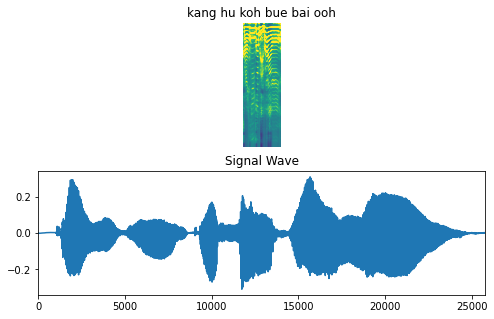

In [10]:
fig = plt.figure(figsize=(8, 5))
for batch in train_dataset.take(1):
  spectrogram = batch[0][0].numpy()
  spectrogram = np.array([np.trim_zeros(x) for x in np.transpose(spectrogram)])
  label = batch[1][0]
  # Spectrogram
  label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
  print(label)
  ax = plt.subplot(2, 1, 1)
  ax.imshow(spectrogram, vmax=1)
  ax.set_title(label)
  ax.axis("off")
  # Wav
  file = tf.io.read_file(wavs_path + list(df_train["id"])[0] + ".wav")
  audio, _ = tf.audio.decode_wav(file)
  audio = audio.numpy()
  ax = plt.subplot(2, 1, 2)
  plt.plot(audio)
  ax.set_title("Signal Wave")
  ax.set_xlim(0, len(audio))
  display.display(display.Audio(np.transpose(audio), rate=16000))
plt.show()

In [11]:
def CTCLoss(y_true, y_pred):
  # Compute the training-time loss value
  batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
  input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
  label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

  input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
  label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

  loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
  return loss


In [12]:
def build_model(input_dim, output_dim, rnn_layers=5, rnn_units=128):
    """Model similar to DeepSpeech2."""
    # Model's input
    input_spectrogram = layers.Input((None, input_dim), name="input")
    # Expand the dimension to use 2D CNN.
    x = layers.Reshape((-1, input_dim, 1), name="expand_dim")(input_spectrogram)
    # Convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 41],
        strides=[2, 2],
        padding="same",
        use_bias=False,
        name="conv_1",
    )(x)
    x = layers.BatchNormalization(name="conv_1_bn")(x)
    x = layers.ReLU(name="conv_1_relu")(x)
    # Convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 21],
        strides=[1, 2],
        padding="same",
        use_bias=False,
        name="conv_2",
    )(x)
    x = layers.BatchNormalization(name="conv_2_bn")(x)
    x = layers.ReLU(name="conv_2_relu")(x)
    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    # RNN layers
    for i in range(1, rnn_layers + 1):
        recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            return_sequences=True,
            reset_after=True,
            name=f"gru_{i}",
        )
        x = layers.Bidirectional(
            recurrent, name=f"bidirectional_{i}", merge_mode="concat"
        )(x)
        if i < rnn_layers:
            x = layers.Dropout(rate=0.5)(x)
    # Dense layer
    x = layers.Dense(units=rnn_units * 2, name="dense_1")(x)
    x = layers.ReLU(name="dense_1_relu")(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    output = layers.Dense(units=output_dim + 1, activation="softmax")(x)
    # Model
    model = keras.Model(input_spectrogram, output, name="DeepSpeech_2")

    # learning_rate = CustomSchedule(
    # init_lr=0.00001,
    # lr_after_warmup=0.001,
    # final_lr=0.00001,
    # warmup_epochs=15,
    # decay_epochs=85,
    # steps_per_epoch=2531//8,
    # )

    # opt = keras.optimizers.Adam(learning_rate)
    
    # Optimizer
    opt = keras.optimizers.Adam(learning_rate=1e-4)
    # Compile the model and return
    model.compile(optimizer=opt, loss=CTCLoss)
    return model


# Get the model
model = build_model(
    input_dim=fft_length // 2 + 1,
    output_dim=char_to_num.vocabulary_size(),
    rnn_units=512,
)
model.summary(line_length=110)

Model: "DeepSpeech_2"
______________________________________________________________________________________________________________
 Layer (type)                                    Output Shape                                Param #          
 input (InputLayer)                              [(None, None, 513)]                         0                
                                                                                                              
 expand_dim (Reshape)                            (None, None, 513, 1)                        0                
                                                                                                              
 conv_1 (Conv2D)                                 (None, None, 257, 32)                       14432            
                                                                                                              
 conv_1_bn (BatchNormalization)                  (None, None, 257, 32)                    

In [13]:
# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    # Iterate over the results and get back the text
    output_text = []
    for result in results:
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
        output_text.append(result)
    return output_text


# A callback class to output a few transcriptions during training
class CallbackEval(keras.callbacks.Callback):
    """Displays a batch of outputs after every epoch."""

    def __init__(self, dataset):
        super().__init__()
        self.dataset = dataset

    def on_epoch_end(self, epoch: int, logs=None):
        predictions = []
        targets = []
        for batch in self.dataset:
            X, y = batch
            batch_predictions = model.predict(X)
            batch_predictions = decode_batch_predictions(batch_predictions)
            predictions.extend(batch_predictions)
            for label in y:
                label = (
                    tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
                )
                targets.append(label)
        wer_score = wer(targets, predictions)
        print("-" * 100)
        print(f"Word Error Rate: {wer_score:.4f}")
        print("-" * 100)
        for i in np.random.randint(0, len(predictions), 2):
            print(f"Target    : {targets[i]}")
            print(f"Prediction: {predictions[i]}")
            print("-" * 100)

In [14]:
os.chdir("/content/drive/MyDrive/nycu/2022ML/rnn")
from keras.callbacks import EarlyStopping ,ModelCheckpoint, ReduceLROnPlateau
#設定early stop
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')
# 設定模型儲存條件(儲存最佳模型)
# 設定earlystop條件
#early = EarlyStopping(monitor='val_loss', patience=10,mode='min', verbose=1)
checkpoint = ModelCheckpoint('rnn_checkpoint.h5', verbose=1,
                              monitor='val_loss', save_best_only=True,
                              mode='auto')
# 設定lr降低條件(0.0001 → 0.0005 → 0.00025 → 0.000125 → 下限：0.00001) auto val_acc
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                           patience=5, mode='auto', verbose=1,
                           min_lr=1e-5)



In [15]:

from keras.models import load_model

#model = load_model('rnn_checkpoint.h5',custom_objects={'CTCLoss': CTCLoss})

In [ ]:
# Define the number of epochs.
epochs = 50 #50 20
# Callback function to check transcription on the val set.
validation_callback = CallbackEval(validation_dataset)
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[validation_callback,early,checkpoint,reduce_lr],
)

Epoch 1/50
 65/313 [=====>........................] - ETA: 23:32 - loss: 87.1387

In [ ]:
# Let's check results on more validation samples
predictions = []
targets = []
for batch in validation_dataset:
    X, y = batch
    batch_predictions = model.predict(X)
    batch_predictions = decode_batch_predictions(batch_predictions)
    predictions.extend(batch_predictions)
    for label in y:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        targets.append(label)
wer_score = wer(targets, predictions)
print("-" * 100)
print(f"Word Error Rate: {wer_score:.4f}")
print("-" * 100)
for i in np.random.randint(0, len(predictions), 5):
    print(f"Target    : {targets[i]}")
    print(f"Prediction: {predictions[i]}")
    print("-" * 100)

In [ ]:
def encode_single_test(wav_file, label):
    ###########################################
    ##  Process the Audio
    ##########################################
    # 1. Read wav file:
    #if train == 1:
    #file = tf.io.read_file(wavs_path + wav_file + ".wav")
    file = tf.io.read_file(test_wavs_path + wav_file + ".wav")
    # else:
    #   file = tf.io.read_file(test_wavs_path + wav_file + ".wav")
    # 2. Decode the wav file
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    # 3. Change type to float
    audio = tf.cast(audio, tf.float32)
    # 4. Get the spectrogram
    spectrogram = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )
    # 5. We only need the magnitude, which can be derived by applying tf.abs
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)
    # 6. normalisation
    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)


    # ########PADDING
    # audio_len = tf.shape(spectrogram)[0]
    # # padding to 10 seconds
    # pad_len = 2754*3
    # paddings = tf.constant([[0, pad_len], [0, 0]])
    # spectrogram = tf.pad(spectrogram, paddings, "CONSTANT")[:pad_len, :]
    # ########PADDING
    ###########################################
    ##  Process the label
    ##########################################
    # 7. Convert label to Lower case
    #print(label)
    #if train == 1:
    label = tf.strings.lower(label)
    # 8. Split the label
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    #print(label) Tensor("UnicodeSplit/UnicodeEncode/UnicodeEncode/UnicodeEncode:0", shape=(None,), dtype=string)
    # 9. Map the characters in label to numbers
    label = char_to_num(label)
    #print(label) Tensor("string_lookup/Identity:0", shape=(None,), dtype=int64)
    # 10. Return a dict as our model is expecting two inputs
    return spectrogram, label

id_to_text_test = []
for i in range(1,347):
  id_to_text_test.append("")




test_id = []
for i in range(1,346+1):
  test_id.append(str(i))


test_dataset = tf.data.Dataset.from_tensor_slices(   
    (test_id, id_to_text_test)
)

test_dataset = (
    test_dataset.map(encode_single_test, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)


predictions = []
for batch in test_dataset:
  X, y = batch
  batch_predictions = model.predict(X)
  batch_predictions = decode_batch_predictions(batch_predictions)
  predictions.extend(batch_predictions)



In [ ]:

submit_ans = []
for i in predictions:
  print(i)
  submit_ans.append(i)
submit_ans
#MAE(valid_y,submit_ans)
import csv

# co_id_np = np.array(co_id)
# year_np = np.array(year)

# data = np.array([co_id_np, year_np])

# np.savetxt("sample.csv", data.T, fmt='%s', delimiter='\t')
test_id = list(range(1,346+1))    
#with open('submit.csv', 'w', newline='',encoding='UTF-8-sig') as test_file:
os.chdir("/content/drive/MyDrive/nycu/2022ML/rnn")
# !ls
with open('311581024.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['id', 'text'])
    for x,y in zip (test_id,submit_ans):
        writer.writerow([x,y])

In [ ]:
!pip install pipreqs
!pipreqs --force

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
INFO: Successfully saved requirements file in /content/drive/MyDrive/nycu/2022ML/rnn/requirements.txt


In [ ]:
!pip freeze > requirements.txt

In [ ]:
import sys
print(sys.modules.keys())

dict_keys(['sys', 'builtins', '_frozen_importlib', '_imp', '_warnings', '_io', 'marshal', 'posix', '_frozen_importlib_external', '_thread', '_weakref', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', '_abc', 'abc', 'io', 'types', 'enum', '_sre', 'sre_constants', 'sre_parse', 'sre_compile', '_collections_abc', '_operator', 'operator', 'keyword', '_heapq', 'heapq', 'itertools', 'reprlib', '_collections', 'collections', '_functools', 'functools', '_locale', 'copyreg', 're', 'warnings', '_stat', 'stat', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_bootlocale', 'importlib._bootstrap', 'importlib._bootstrap_external', 'importlib', 'importlib.machinery', 'importlib.abc', 'contextlib', 'importlib.util', 'google', 'google.cloud', 'google.logging', 'mpl_toolkits', 'sphinxcontrib', 'sitecustomize', 'site', '_weakrefset', 'weakref', 'pkgutil', 'runpy', 'ipykernel._version', '__future__', '